# Problem Statement

- Dataset is Adult income census dataset
- Whether a person is earning more or less than $50000 a year

# About the dataset
- **Age**: Describes the age of individuals. Continuous.
- **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: Continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: Number of years spent in education. Continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: Continuous.
- **capital-loss**: Continuous.
- **hours-per-week**: Continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary**: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (15, 6)})
pd.pandas.set_option("display.max_columns", None)

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.rename(columns={'education.num': 'education_number',
                   'marital.status':'marital_status',
                   'capital.gain':'capital_gain',
                   'capital.loss':'capital_loss',
                   'hours.per.week':'hours_per_week',
                   'native.country':'native_country'
                  }, inplace=True)


In [6]:
df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_number',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education_number     int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income              object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_number  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_number    0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [11]:
df.duplicated().sum()

24

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
cat_col= df.select_dtypes(include='object').columns
num_col= df.select_dtypes(exclude='object').columns

In [16]:
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [17]:
num_col

Index(['age', 'fnlwgt', 'education_number', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [18]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
for i in cat_col:
    print(i)
    print(df[i].unique())
    print()
    print('*******************************************************************************')
    print()

workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*******************************************************************************

education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*******************************************************************************

marital_status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*******************************************************************************

occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

************************************************************

In [21]:
# remove ? and replace with mode value # .mode()
df["workclass"] = df["workclass"].replace("?",df["workclass"].mode()[0])
df["occupation"] = df["occupation"].replace("?",df["occupation"].mode()[0])
df["native_country"] = df["native_country"].replace("?",df["native_country"].mode()[0])

# Data Visualization

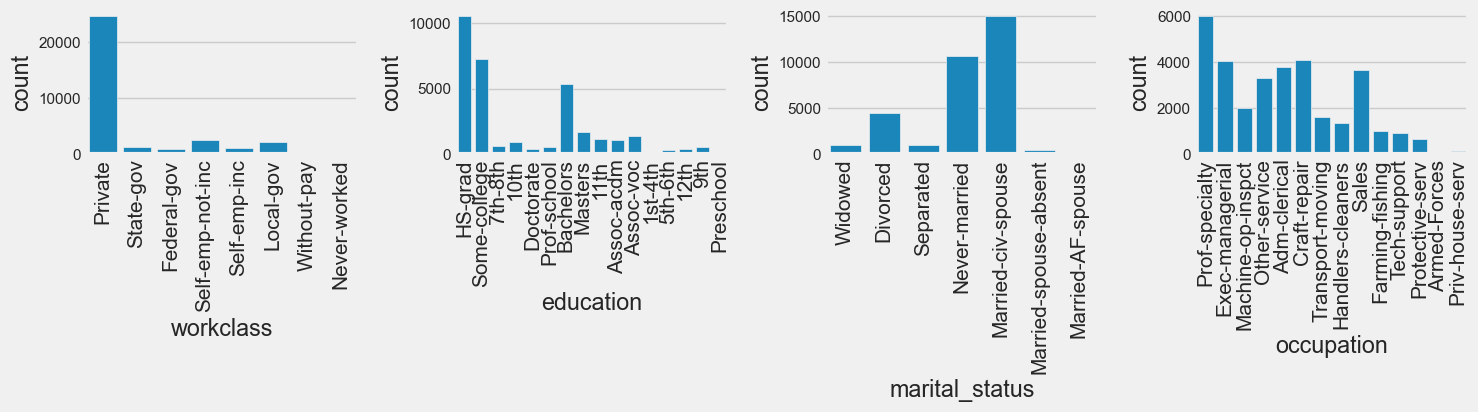

In [22]:
sns.set(rc={"figure.figsize": (15, 6)})
colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(colmns1)):
    plt.style.use('fivethirtyeight')
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

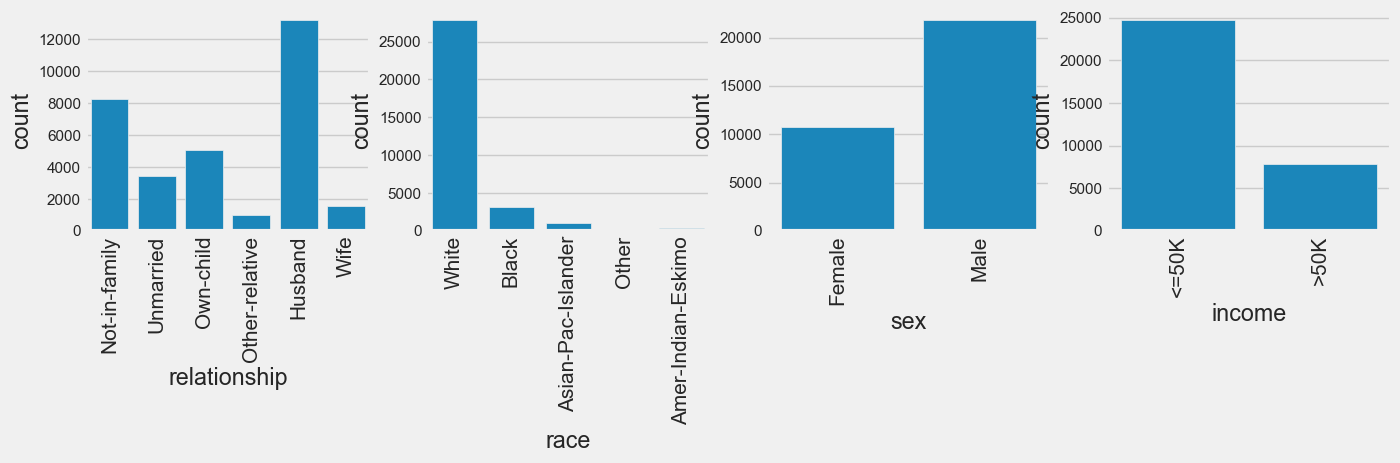

In [24]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns2[i]])
    plt.xticks(size=15,rotation=90)


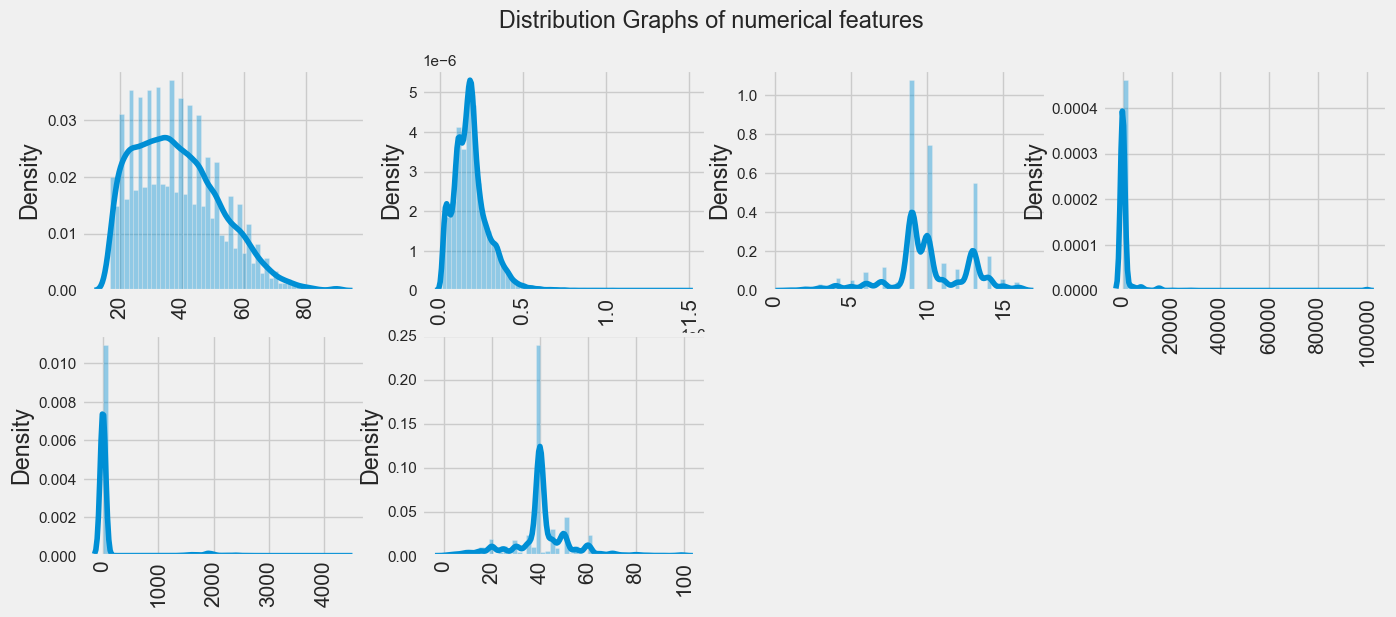

In [25]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(num_col)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xticks(size=15,rotation=90)


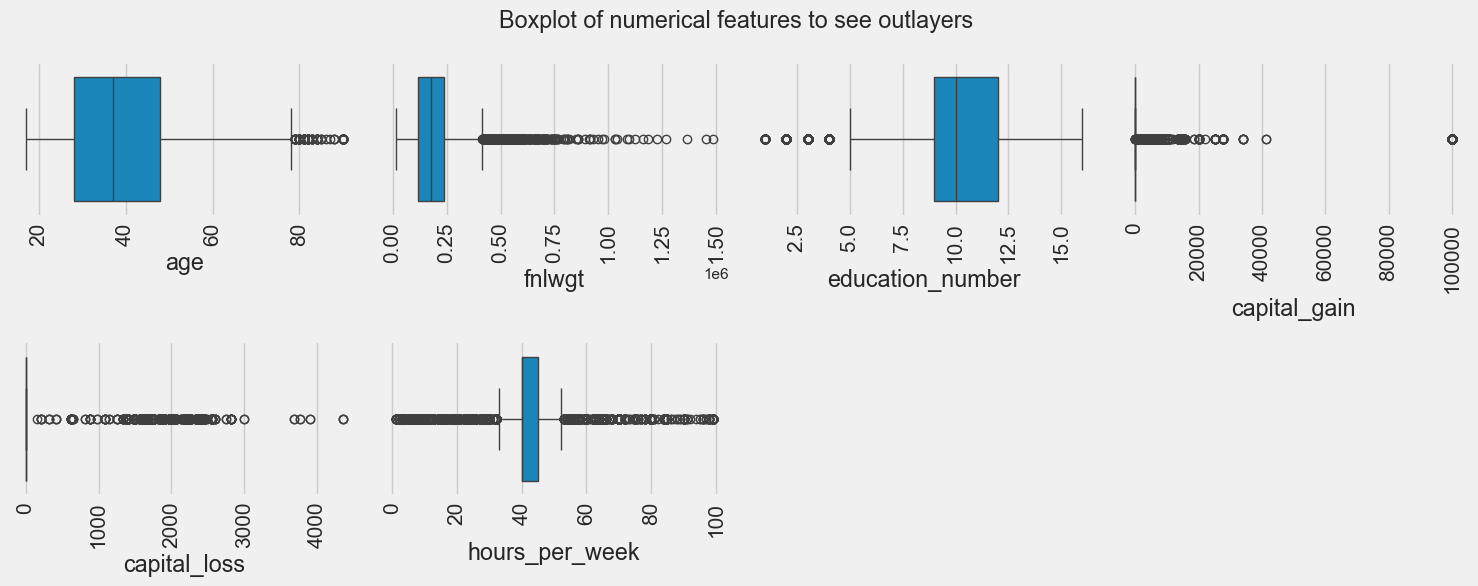

In [26]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(num_col)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [27]:
df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income'>

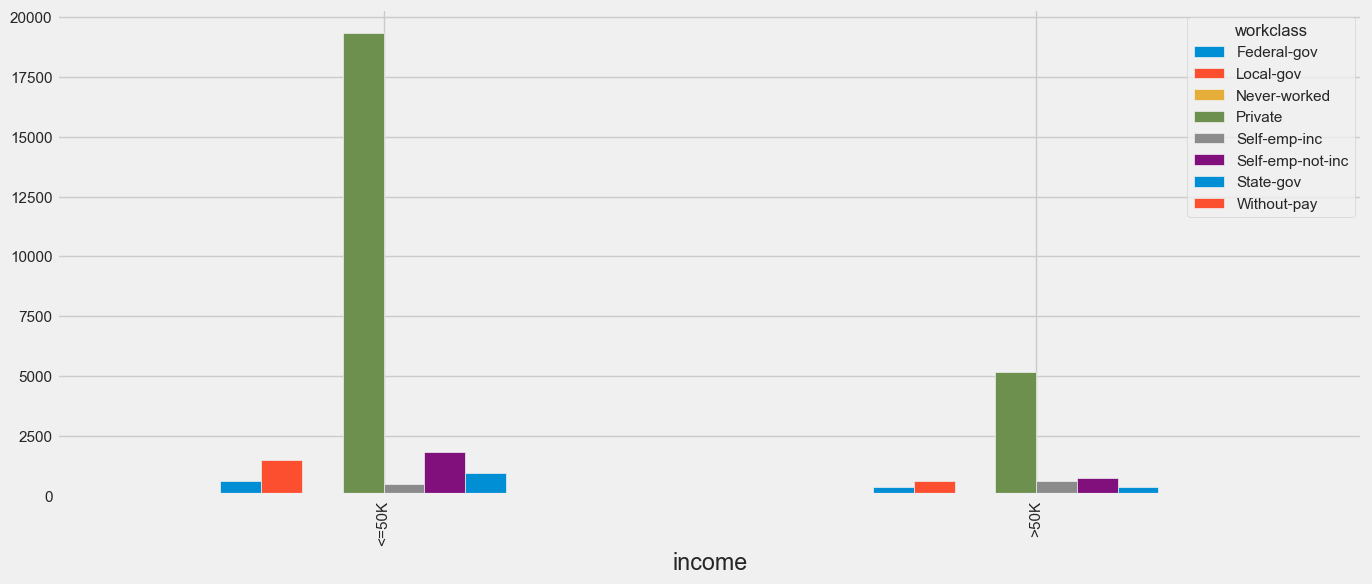

In [28]:
salary = pd.crosstab(df['income'],df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

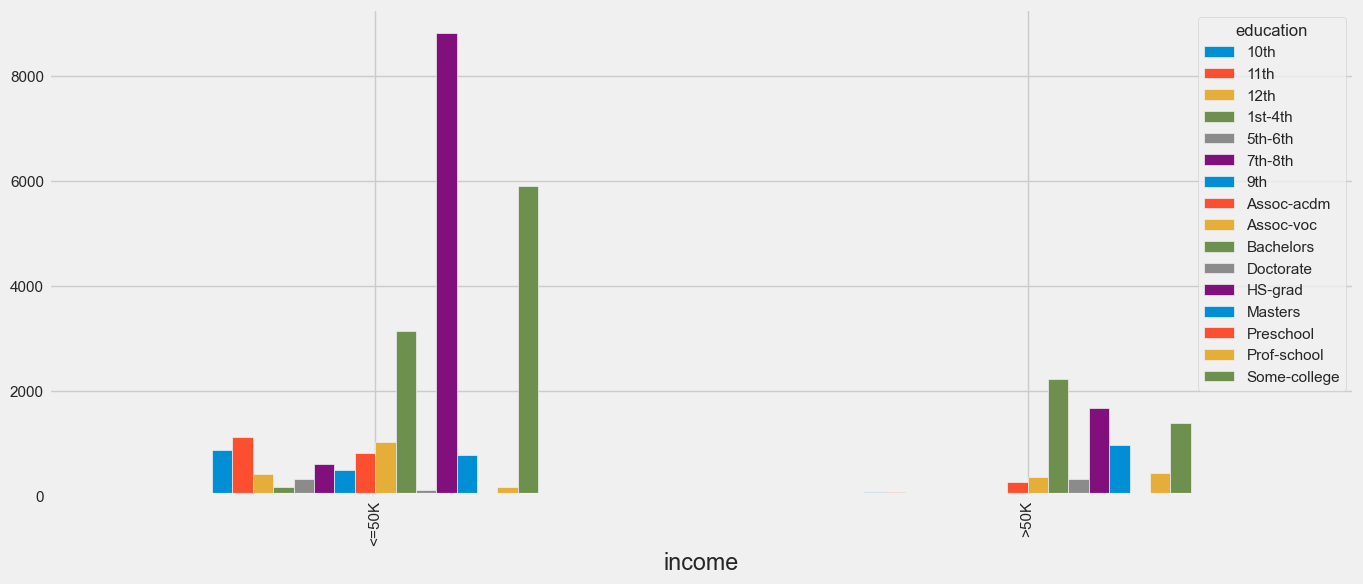

In [29]:
education = pd.crosstab(df['income'],df['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

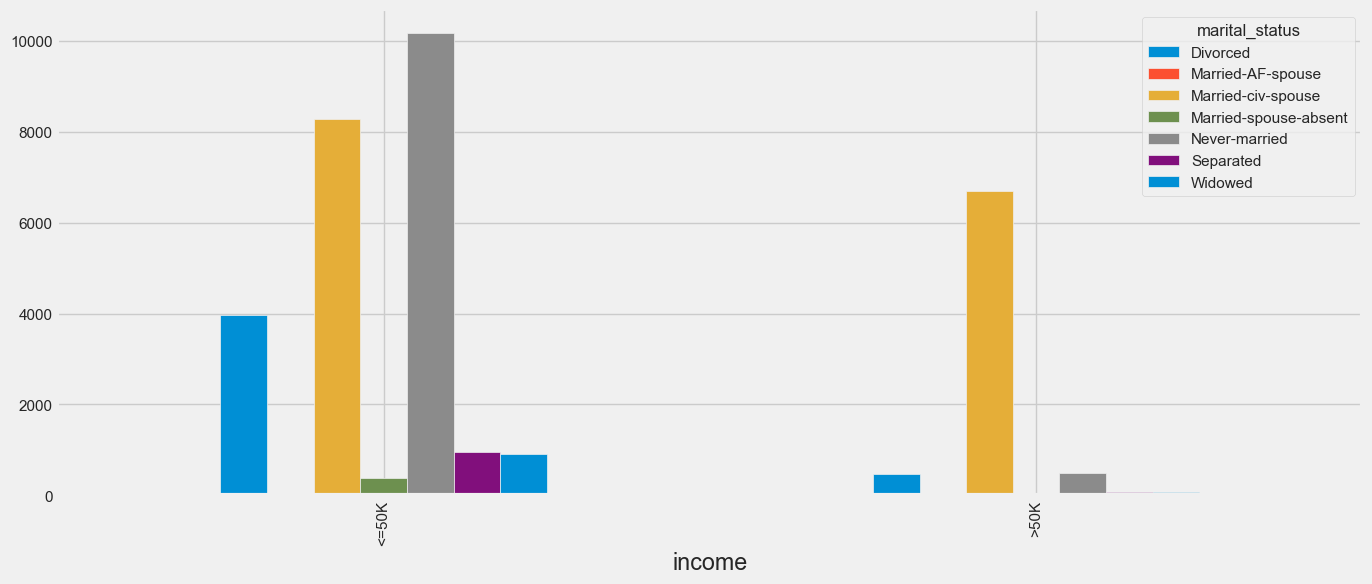

In [30]:
marital_status = pd.crosstab(df['income'],df['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

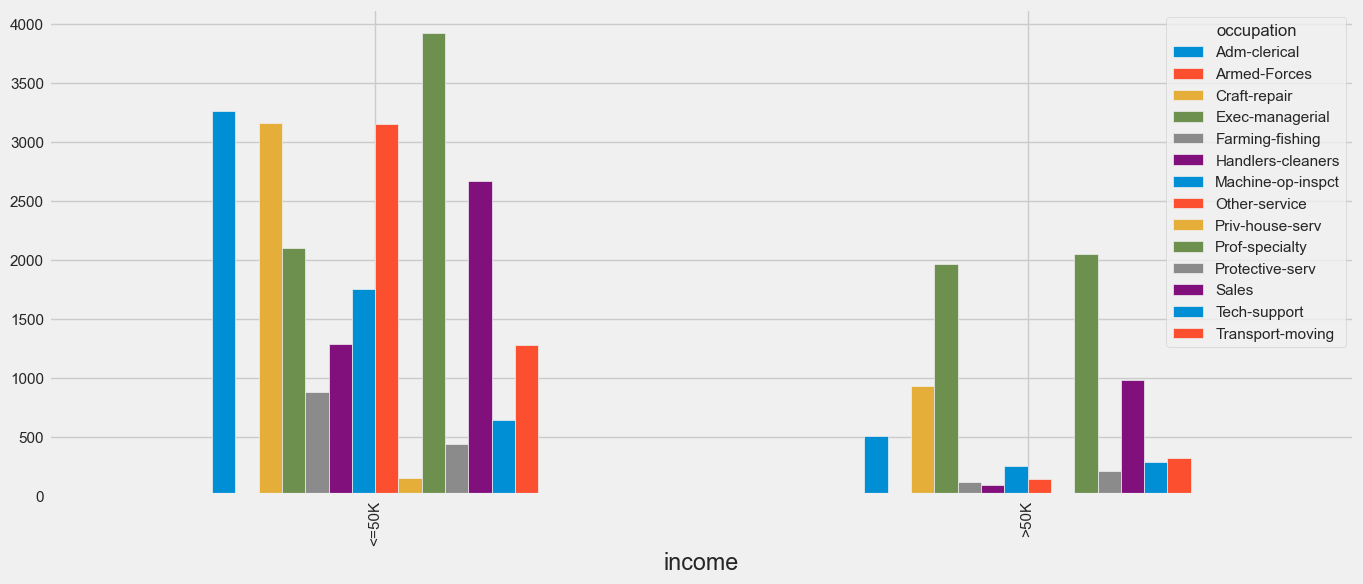

In [31]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

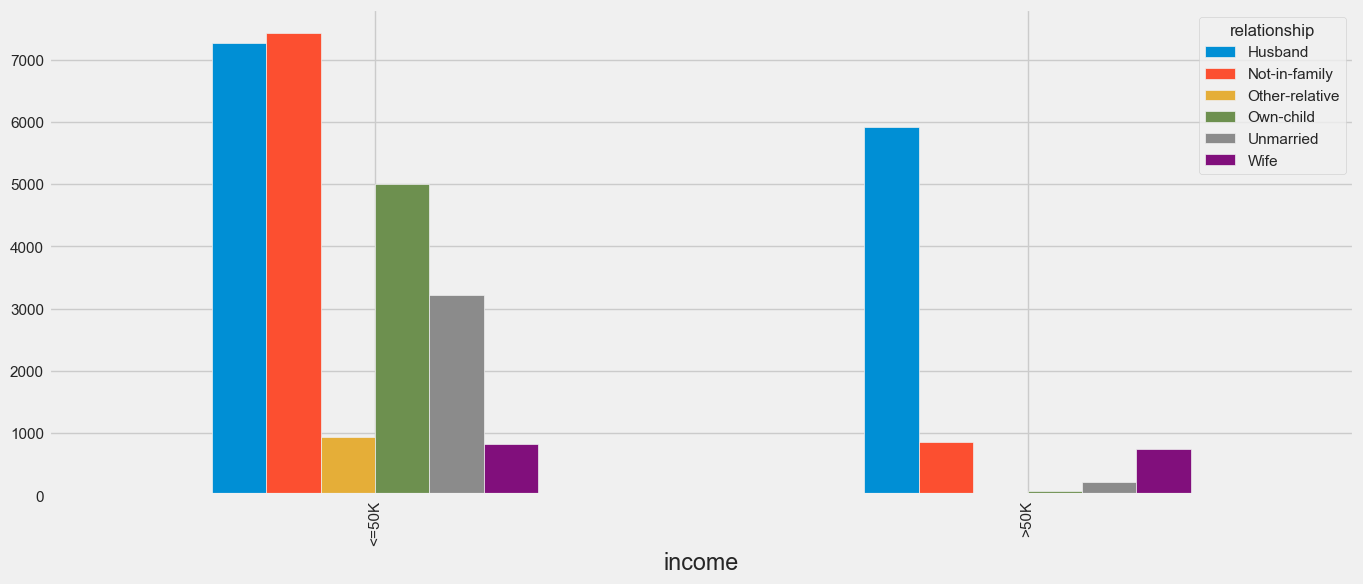

In [32]:
relationship = pd.crosstab(df['income'],df['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

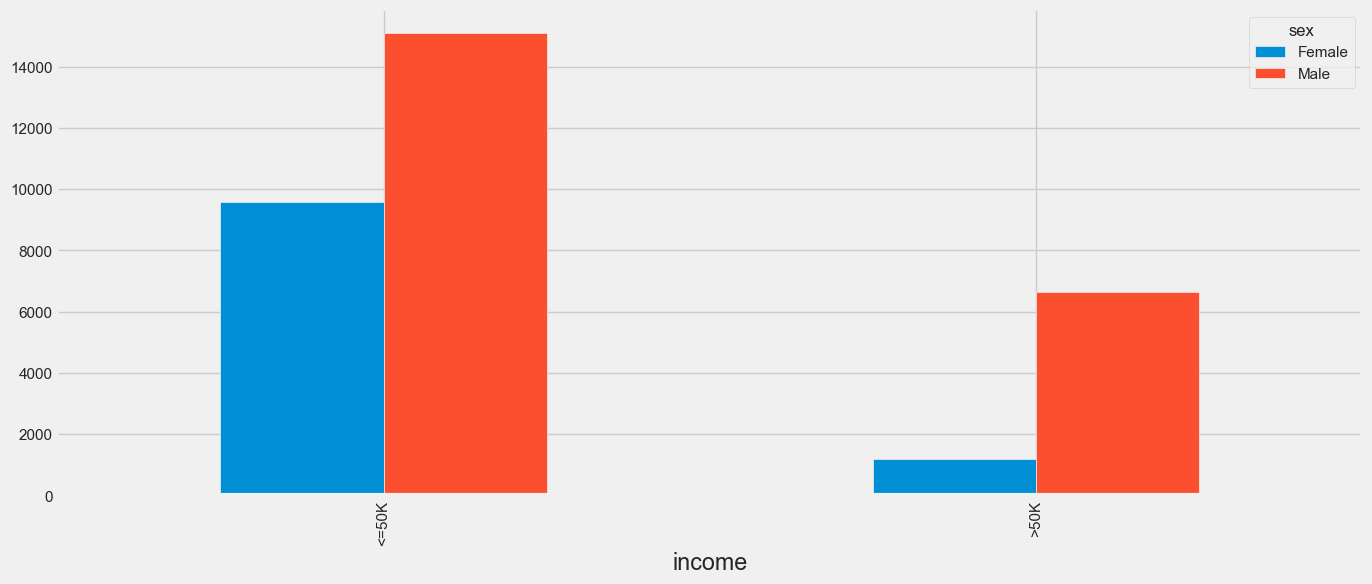

In [33]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind="bar")

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_col = list(cat_col)
cat_col.remove('income')

for i in cat_col:
    le.fit(df[i])
    df[i] = le.transform(df[i])


In [35]:
df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,<=50K
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K


In [36]:
df['income']=df.income.map({'<=50K': 0, '>50K': 1})

In [37]:
df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<Axes: >

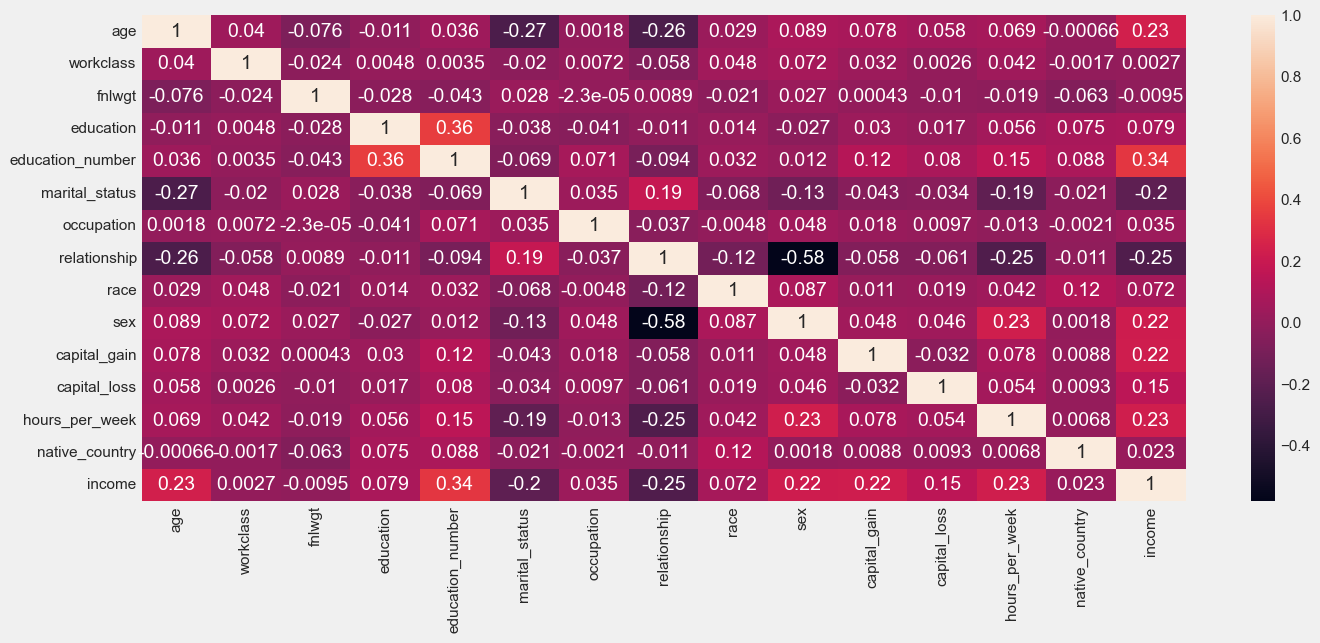

In [38]:
sns.heatmap(df.corr(), annot=True)

In [39]:
df.drop(columns=['fnlwgt'], inplace=True)

In [40]:
df.to_csv('cleaned_data.csv', index=False)

In [41]:
df.shape

(32537, 14)

# Model Training

In [42]:
x=df.drop(columns=['income'])
y=df.income

In [43]:
cat_col = x.select_dtypes(include="object").columns
num_col = x.select_dtypes(exclude="object").columns
print(cat_col)
print(num_col)

Index([], dtype='object')
Index(['age', 'workclass', 'education', 'education_number', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [45]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,num_col)
])

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)


In [48]:
X_train_smote.shape

(39420, 13)

In [49]:
X_test_smote.shape

(9976, 13)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [51]:
def performance_metrics(test, predict):
    confusionmetrix = confusion_matrix(test, predict)
    precision = precision_score(test, predict)
    recall = recall_score(test, predict)
    f1score = f1_score(test, predict)
    accuracyscore = accuracy_score(test, predict)

    print(f"CONFUSION_MATRIX:\n{confusionmetrix}")
    print(f"PRECISION_SCORE: {precision}")
    print(f"RECALL_SCORE: {recall}")
    print(f"F1_SCORE: {f1score}")
    print(f"ACCURACY_SCORE: {accuracyscore}")

    return confusionmetrix, precision, recall, f1score, accuracyscore


In [137]:
lr = LogisticRegression()
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']

}
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)
grid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [138]:
lr=LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear')
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [139]:
lr_pred= lr.predict(X_test_smote)

In [140]:
metrics = performance_metrics(y_test_smote, lr_pred)

CONFUSION_MATRIX:
[[3731 1257]
 [1066 3922]]
PRECISION_SCORE: 0.7572890519405291
RECALL_SCORE: 0.7862870890136328
F1_SCORE: 0.7715156880102292
ACCURACY_SCORE: 0.7671411387329591


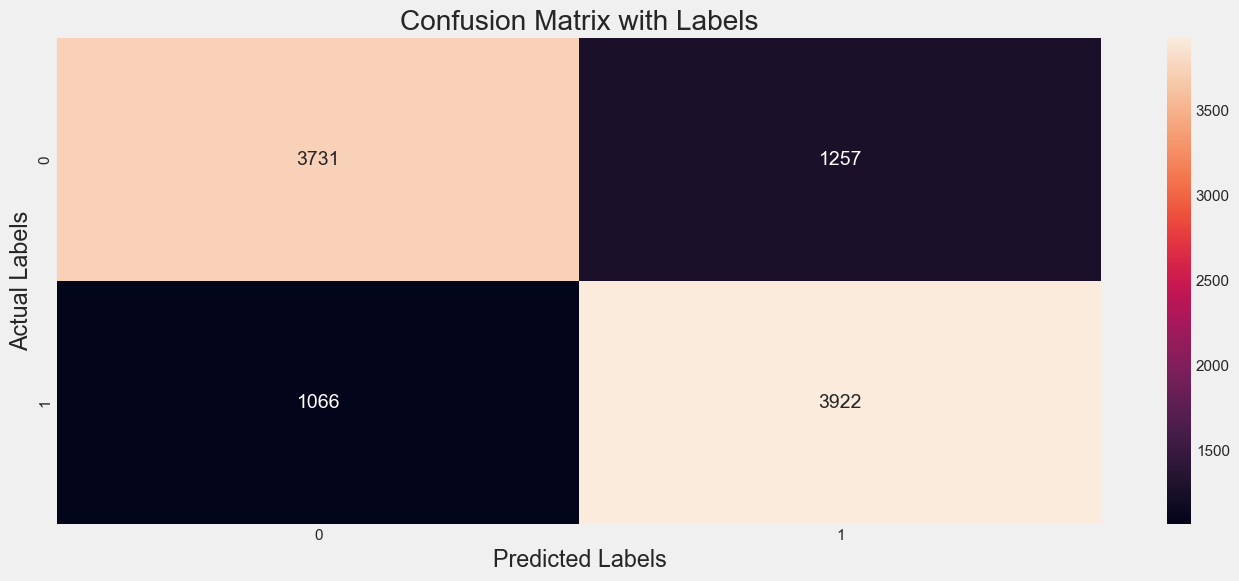

In [141]:
sns.heatmap(confusion_matrix(y_test_smote, lr_pred), annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [142]:
print(classification_report(y_test_smote,lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      4988
           1       0.76      0.79      0.77      4988

    accuracy                           0.77      9976
   macro avg       0.77      0.77      0.77      9976
weighted avg       0.77      0.77      0.77      9976



# Decision Tree

In [143]:
dr = DecisionTreeClassifier()
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [144]:
dt=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=6, max_features='sqrt', min_samples_split=4)
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features='sqrt', min_samples_split=4)

In [145]:
dt_pred=dt.predict(X_test_smote)

In [146]:
metrics = performance_metrics(y_test_smote, dt_pred)

CONFUSION_MATRIX:
[[3642 1346]
 [ 564 4424]]
PRECISION_SCORE: 0.7667244367417677
RECALL_SCORE: 0.8869286287089013
F1_SCORE: 0.8224577058932887
ACCURACY_SCORE: 0.8085404971932638


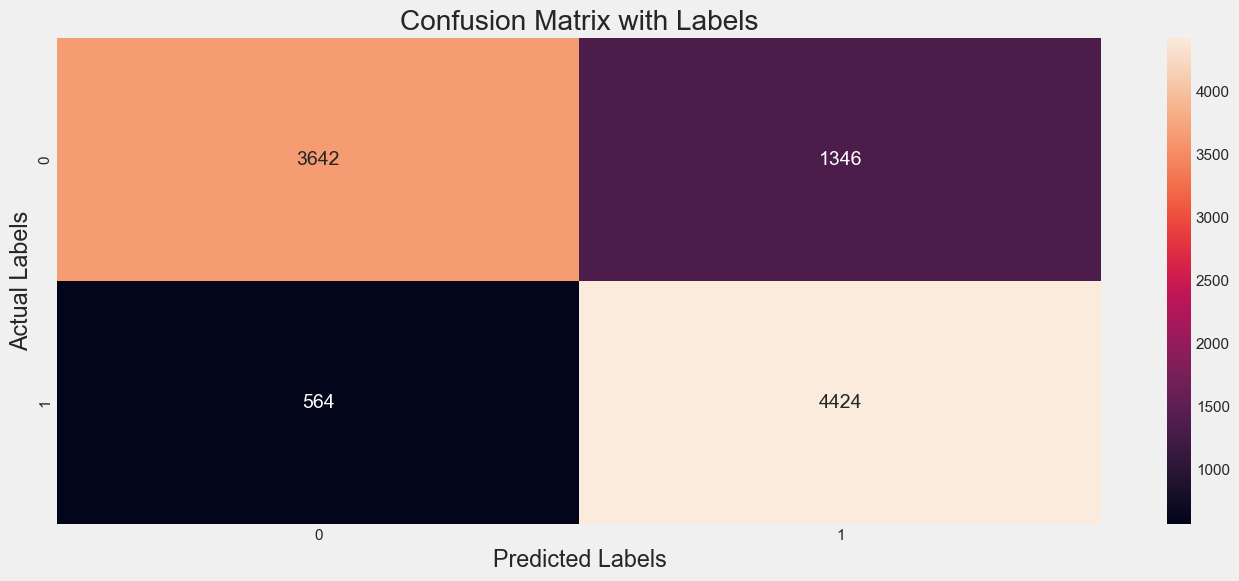

In [147]:
sns.heatmap(confusion_matrix(y_test_smote, dt_pred), annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [148]:
print(classification_report(y_test_smote,dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      4988
           1       0.77      0.89      0.82      4988

    accuracy                           0.81      9976
   macro avg       0.82      0.81      0.81      9976
weighted avg       0.82      0.81      0.81      9976



# Random Forest

In [52]:
rf = RandomForestClassifier()
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [53]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=50)

In [54]:
rf= RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50, min_samples_split=5)

In [55]:
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=50)

In [56]:
rf_pred= rf.predict(X_test_smote)

In [57]:
metrics = performance_metrics(y_test_smote, rf_pred)

CONFUSION_MATRIX:
[[3990  998]
 [ 467 4521]]
PRECISION_SCORE: 0.8191701395180286
RECALL_SCORE: 0.9063753007217321
F1_SCORE: 0.8605691443799371
ACCURACY_SCORE: 0.8531475541299118


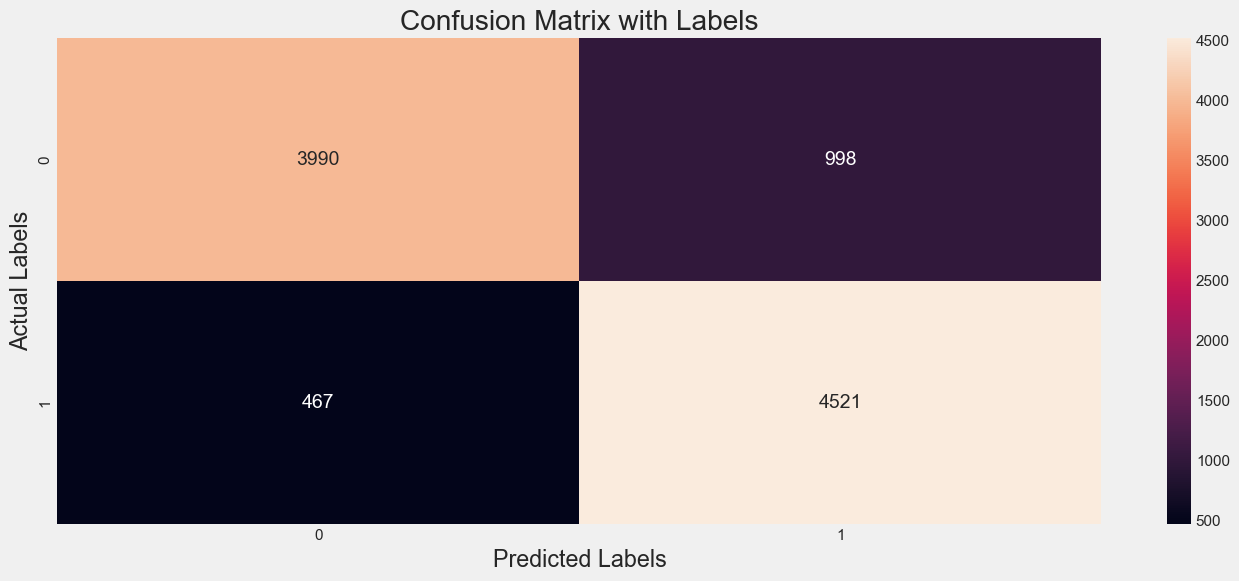

In [58]:
sns.heatmap(confusion_matrix(y_test_smote, rf_pred), annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix with Labels')
plt.show()

In [59]:
print(classification_report(y_test_smote,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      4988
           1       0.82      0.91      0.86      4988

    accuracy                           0.85      9976
   macro avg       0.86      0.85      0.85      9976
weighted avg       0.86      0.85      0.85      9976



In [60]:
df.columns

Index(['age', 'workclass', 'education', 'education_number', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [65]:
import pickle 

with open('model.pkl', 'rb') as file:
    model= pickle.load(file)

